In [96]:
import numpy as np 
import pandas as pd  
from scipy.stats import normaltest
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import sklearn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import pickle


In [97]:
german_Bank = pd.read_table("german.data",sep=" ", header=None)

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [98]:

Ne= ['Status','Duration','credit_history','Purpose','Credit_amount','Saving_account','YOJ','Installment_percentage','Status_SEX','debtors_guarantors','Present_residence','Property','Age_years','installment_plans','Housing','existing_credits','Job','people_maintenance','Telephone','Foreign_warker','Cost']

german_Bank = pd.read_table("german.data",sep=" ", header=None, names=Ne)
german_Bank .head()

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Status,Duration,credit_history,Purpose,Credit_amount,Saving_account,YOJ,Installment_percentage,Status_SEX,debtors_guarantors,...,Property,Age_years,installment_plans,Housing,existing_credits,Job,people_maintenance,Telephone,Foreign_warker,Cost
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [99]:
german_Bank.columns

Index(['Status', 'Duration', 'credit_history', 'Purpose', 'Credit_amount',
       'Saving_account', 'YOJ', 'Installment_percentage', 'Status_SEX',
       'debtors_guarantors', 'Present_residence', 'Property', 'Age_years',
       'installment_plans', 'Housing', 'existing_credits', 'Job',
       'people_maintenance', 'Telephone', 'Foreign_warker', 'Cost'],
      dtype='object')

In [100]:
dataNumeric = pd.read_csv("german.data-numeric",sep= "\s+",header=None)
dataNumeric.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [101]:
# Pour la banque de German il y a pas de données manquantes Donc on va faire directement l'encodage (One Hot Encoder)
german_Bank_1=german_Bank
# one hot encoding
df1 = pd.get_dummies(german_Bank_1.Status)
df1.rename(columns = {'A11':'Status_A11','A12':'Status_A12','A13':'Status_A13','A14':'Status_A14'}, inplace = True)
df2 = pd.get_dummies(german_Bank_1.credit_history)
df2.rename(columns = {'A30':'CredHist_A30','A31':'CredHist_A31','A32':'CredHist_A32','A33':'CredHist_A33','A34':'CredHist_A34'}, inplace = True)
df3 = pd.get_dummies(german_Bank_1.Purpose)
df3.rename(columns = {'A40':'Purpose_A40','A41':'Purpose_A41','A42':'Purpose_A42','A43':'Purpose_A43','A44':'Purpose_A44','A45':'Purpose_A45','A46':'Purpose_A46','A47':'Purpose_A47','A48':'Purpose_A48','A49':'Purpose_A49','A410':'Purpose_A410'}, inplace = True)
df4 = pd.get_dummies(german_Bank_1.Saving_account)
df4.rename(columns = {'A61':'SaveAccount_A61','A62':'SaveAccount_A62','A63':'SaveAccount_A63','A64':'SaveAccount_A64','A65':'SaveAccount_A65'}, inplace = True)
df5 = pd.get_dummies(german_Bank_1.YOJ)
df5.rename(columns = {'A71':'YOJ_A71','A72':'YOJ_A72','A73':'YOJ_A73','A74':'YOJ_A74','A75':'YOJ_A75'}, inplace = True)
df6 = pd.get_dummies(german_Bank_1.Status_SEX)
df6.rename(columns = {'A91':'Status&Sex_A91','A92':'Status&Sex_A92','A93':'Status&Sex_A93','A94':'Status&Sex_A94','A95':'Status&Sex_A95'}, inplace = True)
df7 = pd.get_dummies(german_Bank_1.debtors_guarantors)
df7.rename(columns = {'A101':'DebGuarant_A101','A102':'DebGuarant_A102','A103':'DebGuarant_A103'}, inplace = True)
df9 = pd.get_dummies(german_Bank_1.Property)
df9.rename(columns = {'A121':'Property_A121','A122':'Property_A122','A123':'Property_A123','A124':'Property_A124'}, inplace = True)
df10 = pd.get_dummies(german_Bank_1.installment_plans)
df10.rename(columns = {'A141':'InstallPlan_A141','A142':'InstallPlan_A142','A143':'InstallPlan_A143'}, inplace = True)
df11 = pd.get_dummies(german_Bank_1.Housing)
df11.rename(columns = {'A151':'Housing_A151','A152':'Housing_A152','A153':'Housing_A153'}, inplace = True)
df12 = pd.get_dummies(german_Bank_1.Job)
df12.rename(columns = {'A171':'Job_A171','A172':'Job_A172','A173':'Job_A173','A174':'Job_A174'}, inplace = True)
df13 = pd.get_dummies(german_Bank_1.Telephone)
df13.rename(columns = {'A191':'Tel_None','A192':'Tel_Registred'}, inplace = True)
df14 = pd.get_dummies(german_Bank_1.Foreign_warker)
df14.rename(columns = {'A201':'ForeignWorker_Yes','A202':'ForeignWorker_No'}, inplace = True)

german_Bank_1 = pd.concat([german_Bank_1,df1,df2,df3,df4,df5,df6,df7,df9,df10,df11,df12,df13,df14], axis = 1)
german_Bank_1.drop(labels=['Status','credit_history','Purpose','Saving_account','YOJ','Status_SEX','debtors_guarantors','Property','installment_plans','Housing','Job','Telephone','Foreign_warker'], axis =1, inplace = True)

# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
german_Bank_Final=german_Bank_1.drop(labels=['Cost'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
german_Bank_Final

,Duration,Credit_amount,Installment_percentage,Present_residence,Age_years,existing_credits,people_maintenance,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,36,6948,2,2,35,1,1,0,1,0,...,0,0,0,0,0,1,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,30,5234,4,2,28,2,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0


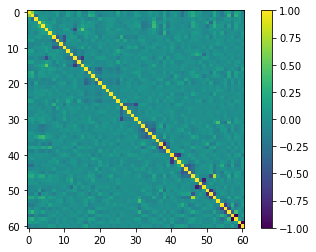

In [102]:
#Voir Les Corrélations de dataframe german_Bank_Final
plt.imshow(german_Bank_Final.corr())
plt.colorbar()

In [103]:
#converting (1,2) to (0,1) in the columns for easier analysis. 
german_Bank_1.loc[(german_Bank_1['Cost'] == 1)] = 0
german_Bank_1.loc[(german_Bank_1['Cost'] == 2)] = 1
cible_german=german_Bank_1["Cost"]
cible_german

0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: Cost, Length: 1000, dtype: int64

In [104]:
#Fonction qui test la normalité d'une colonne 
def testDeNormalite (x):
    a = german_Bank_1[x]
    stat, p = normaltest(a)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

In [105]:
#Fonction qui test la normalité des variables du DAtaframe
def normalitesDesColonnes():
    for i in german_Bank_1:
        testDeNormalite(i)
        print(i);
        print("__");

In [106]:
from scipy.stats import kendalltau
def testKendal (x1,x2):
    stat, p = kendalltau(x1, x2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.005:
        print('Probably independent')
        return False
    else:
        print('Probably dependent')
        return True

In [107]:
#dimension
print(dataNumeric.shape) # (18, 6)
#nombre d'observations
n = dataNumeric.shape[0]
#nombre de variables
p = dataNumeric.shape[1]
#affichage des données

(1000, 25)


In [108]:
a = list(range(1, 10))
k =list(range(2,8)) 
a=[x for x in a if x not in k]
print(a)

[1, 8, 9]


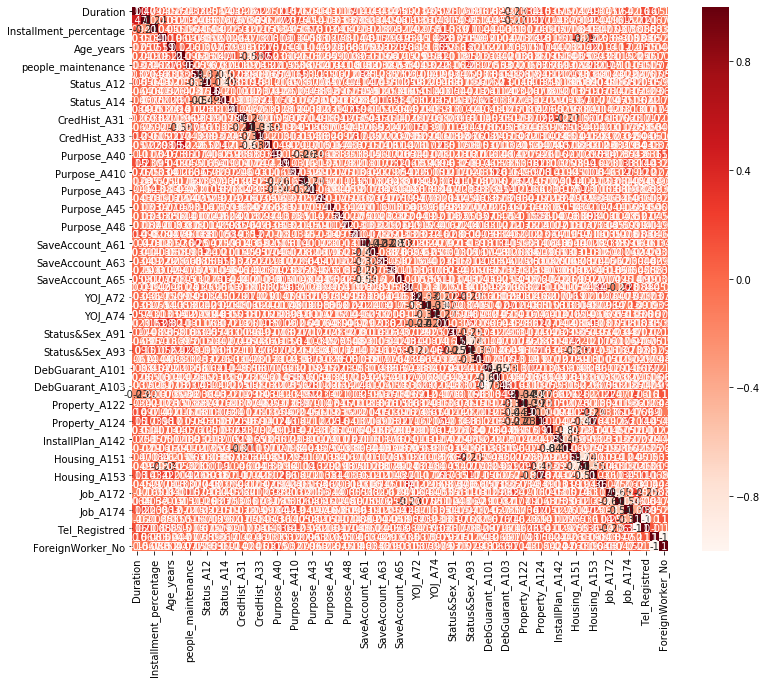

In [109]:
import seaborn as sns 
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = german_Bank_Final.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [110]:
#Voir Les variables qui ont une correlation supérieur à 0.8 
for i in  range (german_Bank.shape[1]):
    for j in range (i+1 , german_Bank_Final.shape[1] ):
        corl = german_Bank_Final.iloc[:,i].corr(german_Bank_Final.iloc[:,j],method='kendall')
        if (corl >= 0.8):
            print(i)
            print(j)
            print(corl)

In [111]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(dataNumeric)
print(Z)

[[-1.25456565 -1.23647786  1.34401408 ... -0.5         0.76635604
  -0.65465367]
 [-0.45902624  2.24819436 -0.50342796 ... -0.5         0.76635604
   1.52752523]
 [ 1.13205258 -0.73866754  1.34401408 ...  2.         -1.30487651
  -0.65465367]
 ...
 [ 1.13205258 -0.73866754 -0.50342796 ... -0.5         0.76635604
  -0.65465367]
 [-1.25456565  1.9992892  -0.50342796 ... -0.5         0.76635604
   1.52752523]
 [-0.45902624  1.9992892   1.34401408 ... -0.5         0.76635604
  -0.65465367]]


In [112]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [113]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6

25


In [114]:
#variance expliquée
print(acp.explained_variance_)

[2.55086882 2.2794142  1.85609381 1.73878409 1.65597403 1.35967065
 1.32117507 1.16783397 1.12509243 1.0145831  0.95244228 0.89273795
 0.86576642 0.8290517  0.79157939 0.70906166 0.64878089 0.60800583
 0.60365826 0.55903409 0.48935941 0.34073838 0.30661755 0.19987003
 0.158831  ]


In [115]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.54831795 2.27713479 1.85423772 1.7370453  1.65431806 1.35831098
 1.3198539  1.16666613 1.12396733 1.01356852 0.95148983 0.89184521
 0.86490066 0.82822265 0.79078781 0.7083526  0.64813211 0.60739783
 0.60305461 0.55847506 0.48887005 0.34039764 0.30631093 0.19967016
 0.15867217]


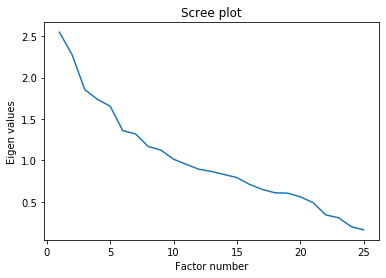

In [116]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

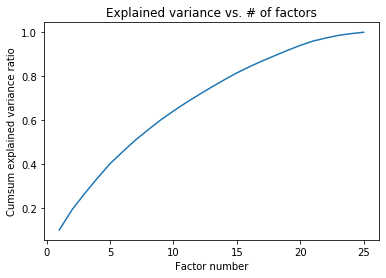

In [117]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [118]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval}))

    Val.Propre
0     2.548318
1     2.277135
2     1.854238
3     1.737045
4     1.654318
5     1.358311
6     1.319854
7     1.166666
8     1.123967
9     1.013569
10    0.951490
11    0.891845
12    0.864901
13    0.828223
14    0.790788
15    0.708353
16    0.648132
17    0.607398
18    0.603055
19    0.558475
20    0.488870
21    0.340398
22    0.306311
23    0.199670
24    0.158672


# Interprétation de dimensions  

In [119]:
# Selon les résultas obtenus dans Scree plot, cumul de variance expliquée et les valeurs propres 
# on a 10 dimensions PCA selon le critére de Kaiser (Eigenvalue > 1)

In [120]:
#contributions aux axes   
ctr = coord**2 
for j in range(p):    
    ctr[:,j] = ctr[:,j]/(n*eigval[j])     
print(pd.DataFrame({'id':dataNumeric.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))    

      id         CTR_1         CTR_2
0      0  1.707520e-04  3.876826e-03
1      1  2.260839e-04  9.726348e-04
2      2  2.574943e-03  9.254031e-04
3      3  1.065375e-03  3.149846e-04
4      4  9.039741e-04  1.979933e-05
5      5  1.695658e-03  2.945541e-04
6      6  9.511301e-07  1.288628e-03
7      7  3.404887e-03  3.832072e-04
8      8  1.165534e-03  4.737557e-04
9      9  8.681786e-06  1.639776e-04
10    10  1.698595e-06  4.618916e-03
11    11  1.879612e-03  4.447025e-03
12    12  5.279129e-05  8.174418e-05
13    13  3.362491e-04  2.121065e-04
14    14  7.404331e-05  2.158975e-03
15    15  3.169815e-04  1.261871e-03
16    16  1.809729e-05  4.178151e-03
17    17  7.572349e-04  9.059532e-06
18    18  6.343852e-03  1.422439e-05
19    19  9.403135e-05  1.192347e-03
20    20  8.586894e-05  3.019814e-03
21    21  5.464184e-05  5.616917e-04
22    22  3.093337e-03  7.242311e-04
23    23  6.398909e-06  5.318154e-04
24    24  1.575665e-03  1.046573e-03
25    25  1.620312e-03  1.667969e-04
2

In [121]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
 
for k in range(p):    
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]      
#afficher la matrice des corrélations variables x facteurs    
corvar; 

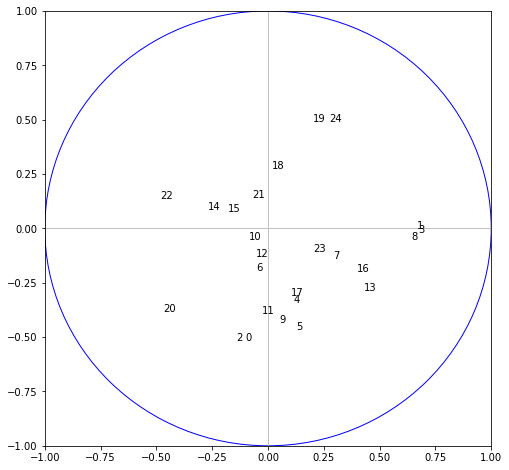

In [122]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(dataNumeric.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [123]:
#on affiche pour les deux premiers axes 
print(pd.DataFrame({'id':dataNumeric.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4]}))

    id     COR_1     COR_2     COR_3     COR_4     COR_5
0    0 -0.102424 -0.515444 -0.120934 -0.194591  0.044344
1    1  0.666387 -0.000475 -0.122386  0.376370 -0.043387
2    2 -0.142237 -0.519018  0.156681 -0.075525  0.252564
3    3  0.674817 -0.019942  0.022462  0.409111 -0.033382
4    4  0.114097 -0.340612  0.029397 -0.166758 -0.001569
5    5  0.127326 -0.466124  0.203516 -0.088547  0.205080
6    6 -0.054206 -0.192640  0.052167  0.142438  0.146398
7    7  0.292419 -0.140557  0.499568 -0.281722  0.126562
8    8  0.644444 -0.050629  0.072665  0.083194 -0.060848
9    9  0.050752 -0.433078  0.437700  0.144310  0.041336
10  10 -0.084361 -0.050277 -0.139450 -0.277642  0.078491
11  11 -0.029075 -0.393899  0.255821  0.053734  0.198803
12  12 -0.053460 -0.129765  0.376078  0.180512 -0.036711
13  13  0.431207 -0.286242  0.023238  0.120191 -0.000935
14  14 -0.268228  0.086866  0.152919  0.028643  0.189075
15  15 -0.179120  0.077673  0.258849  0.098196 -0.020009
16  16  0.396879 -0.200865  0.0

In [124]:
##### print(pd.DataFrame({'id':dataNumeric.columns,'COR_6':corvar[:,0],'COR_7':corvar[:,1],'COR_8':corvar[:,2],'COR_9':corvar[:,3],'COR_10':corvar[:,4]}))

In [125]:
german_Bank_Final.head()

,Duration,Credit_amount,Installment_percentage,Present_residence,Age_years,existing_credits,people_maintenance,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [126]:
X_bad = dataNumeric.iloc[:,0:-1]
X_bad.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1


## Modéle KNN pour la DataFrame 'dataNumeric'

In [127]:
Y_bad= pd.factorize(german_Bank_1["Cost"])[0]

Text(0, 0.5, 'Erreur')

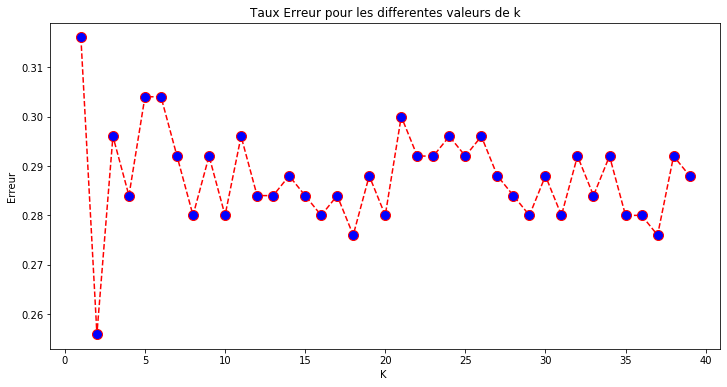

In [128]:
#choisir K pour le modéle
X_train, X_test, y_train, y_test = train_test_split(X_bad, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [129]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [130]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.74


In [131]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.66


In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_bad)
# principalDf = pd.DataFrame(data = principalComponents
#                            , columns = ['principal component 1', 'principal component 2'])

In [133]:
# principalDf.head()

Text(0, 0.5, 'Erreur')

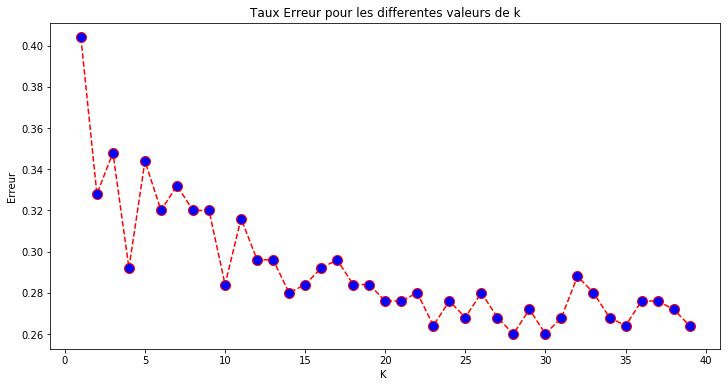

In [134]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [135]:
knn = KNeighborsClassifier(23,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.70


## on test le meilleur nb de comp avec PCA pour appliquer le KNN Nous donne en fin 8 components , avec 0.756 accuracy

In [136]:
def pca_n_accuracy_knn(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (knn.score(X_test, y_test))

In [137]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.756
8


## on test le meilleur nb de comp avec PCA pour appliquer la CART Nous donne en fin 8 components , avec 0.68 accuracy

In [138]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.57


In [139]:
def pca_n_accuracy_cart(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    dtc = DecisionTreeClassifier()
    dtc_model = dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (dtc.score(X_test, y_test))

In [140]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_cart(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.668
16


## on test le meilleur nb de comp avec PCA pour appliquer le FRC Nous donne en fin 6 components , avec 0.764 accuracy

In [141]:
def pca_n_accuracy_rfc(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (rfc.score(X_test, y_test))

In [142]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_rfc(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3

0.74
21


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## on test le meilleur nb de comp avec PCA pour appliquer le Naive Bayes et on a obtenu 8 composants avec une accuracy de 0.72

In [143]:
from sklearn.naive_bayes import GaussianNB
def pca_n_accuracy_NV(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    predictions = gaussian.predict(X_test)
    return (gaussian.score(X_test, y_test))

In [144]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_NV(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.728
8


## on test le meilleur nb de comp avec PCA pour appliquer le DecisionTreeClassifier et on a obtenu 15 composants avec une accuracy de 0.68

In [145]:
from sklearn.tree import DecisionTreeClassifier
def pca_n_accuracy_DecisionT(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    predictions_dt = decision_tree.predict(X_test)
    return (decision_tree.score(X_test, y_test))

In [146]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_DecisionT(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.68
14


## on va essayer avec PCA KERNEL

In [147]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=7, kernel='rbf')
X_transformed = transformer.fit_transform(X_bad)
X_transformed.shape

(1000, 7)

## on test le meilleur nb de comp avec PCA Kernel pour appliquer le KNN et on a obtenu 3 composants avec une accuracy de 0.69

In [148]:
def pcaKernel_n_accuracy_knn(n):
    transformer = KernelPCA(n_components=n, kernel='rbf')
    X_transformed = transformer.fit_transform(X_bad)


    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (knn.score(X_test, y_test))

In [149]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pcaKernel_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.692
3


### Méthode de Naive Bayes

In [150]:
def pcaKernel_n_accuracy_NB(n):
    transformer = KernelPCA(n_components=n, kernel='rbf')
    X_transformed = transformer.fit_transform(X_bad)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    return (gaussian.score(X_test, y_test))

In [151]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pcaKernel_n_accuracy_NB(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)

0.704
1


## Supression des points abbérants en Utilisant la méthode de Z-score

In [152]:
#Affichage du Boxplot montrant les points abbérants

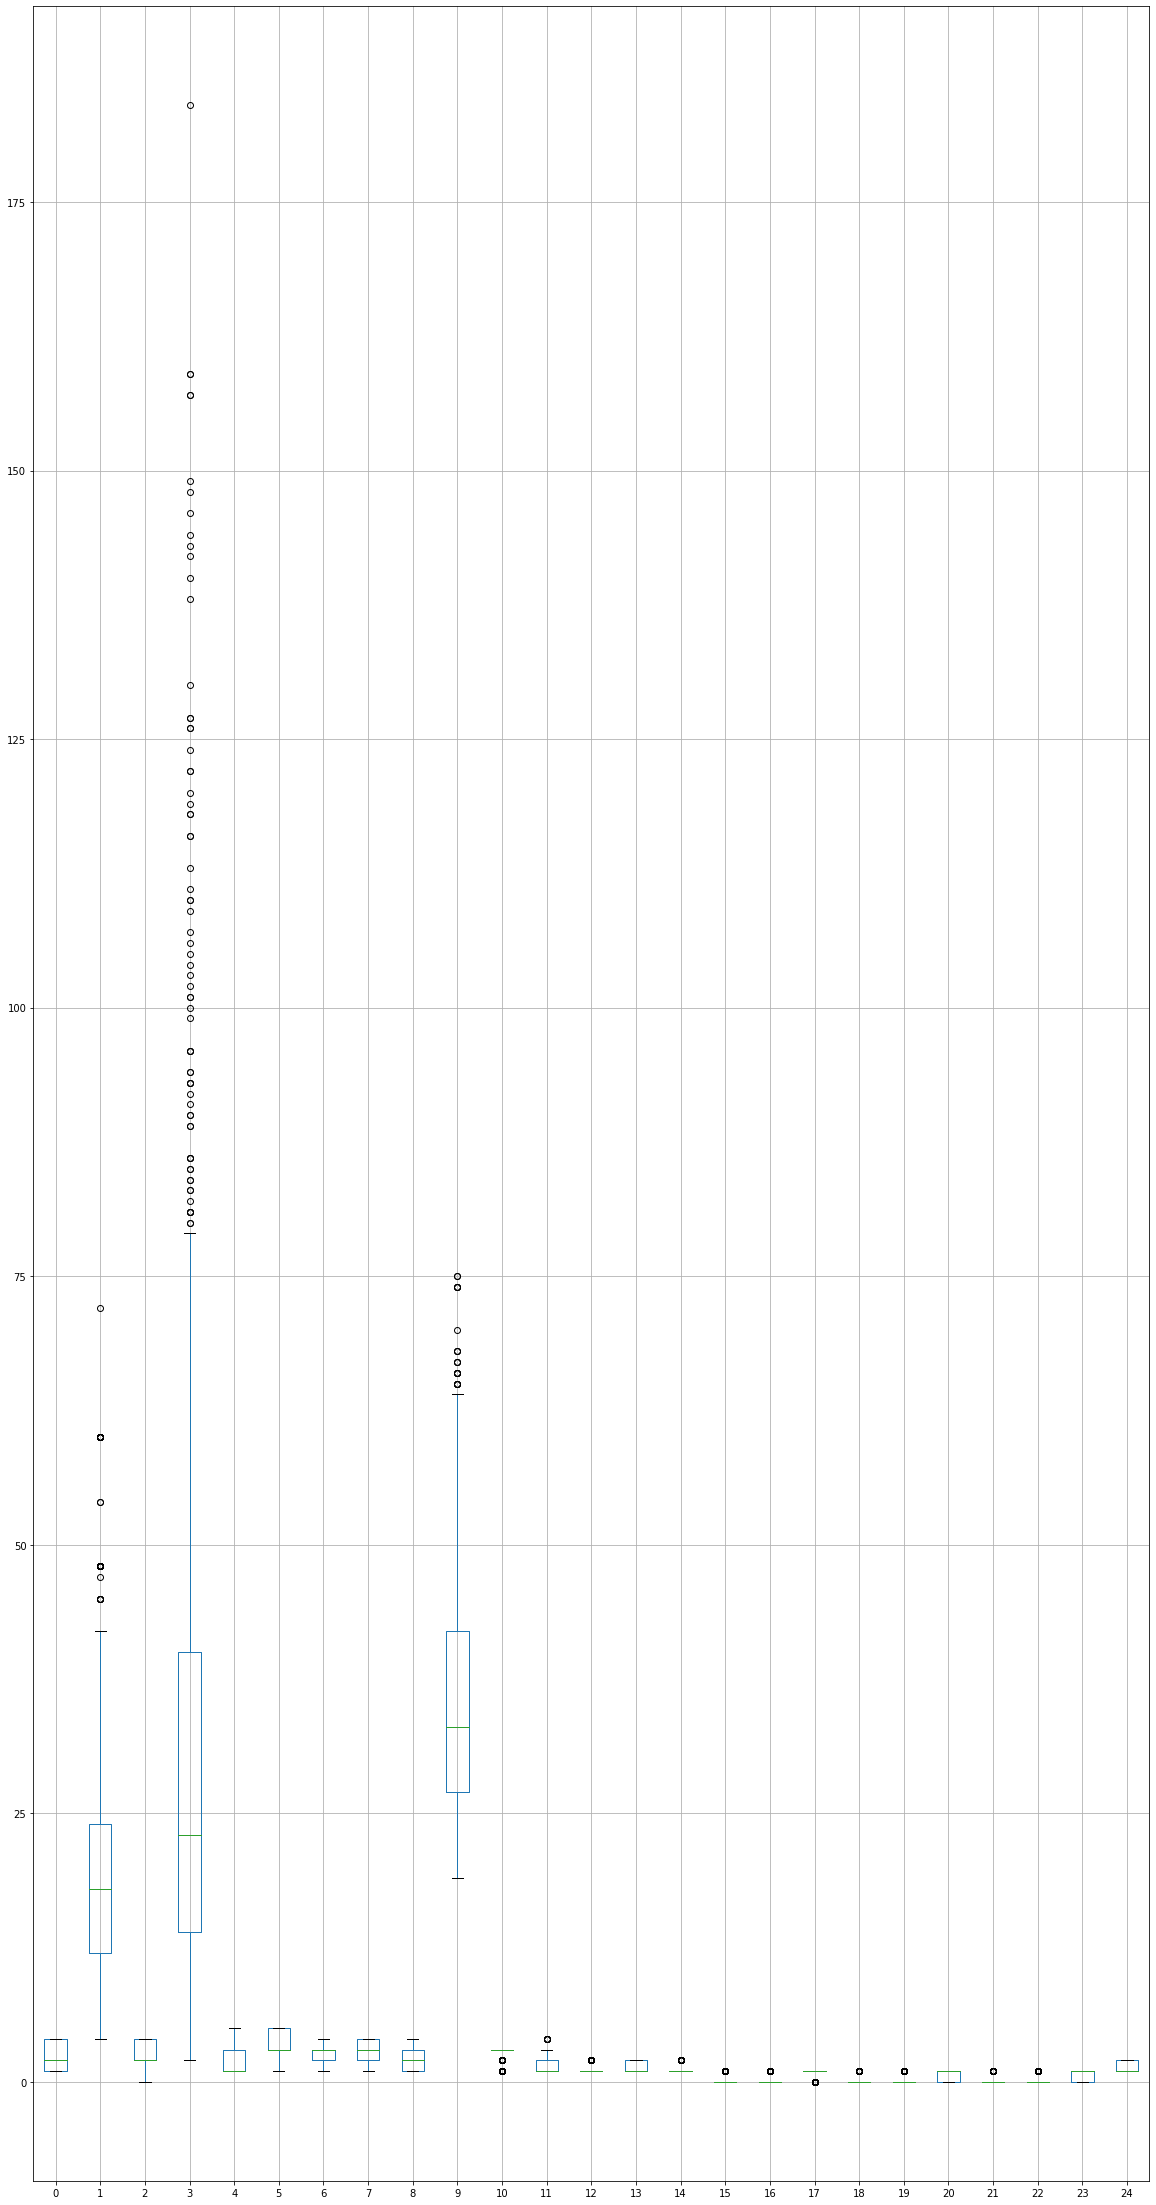

In [153]:
dataNumeric.boxplot(figsize=(20,40))

In [154]:
dataNumericPropre = dataNumeric.copy()

In [155]:
type(dataNumericPropre)

pandas.core.frame.DataFrame

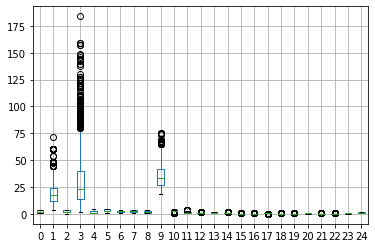

In [156]:
dataNumericPropre.boxplot()

In [157]:
from scipy import stats
import numpy as np  
dataNumericPropre.insert(25,"cible",cible_german)
print(len(dataNumericPropre.columns))
z = np.abs(stats.zscore(dataNumericPropre))
print(z)

26
[[1.25456565 1.23647786 1.34401408 ... 0.76635604 0.65465367 0.65465367]
 [0.45902624 2.24819436 0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [1.13205258 0.73866754 1.34401408 ... 1.30487651 0.65465367 0.65465367]
 ...
 [1.13205258 0.73866754 0.50342796 ... 0.76635604 0.65465367 0.65465367]
 [1.25456565 1.9992892  0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [0.45902624 1.9992892  1.34401408 ... 0.76635604 0.65465367 0.65465367]]


In [158]:
#Liste des points abbérants pour un seuil de 4
threshold = 3
np.where(z > 4);

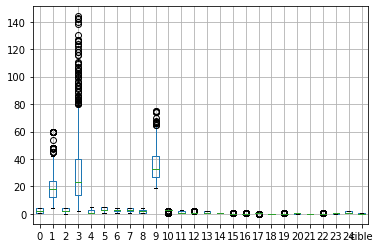

In [159]:
#dataframe aprés la suppression des points
dataNumericPropre1 = dataNumericPropre[(z < 4).all(axis=1)] 
dataNumericPropre1.boxplot()

In [160]:
#saving model 
pickle.dump(dtc , open('model.pkl','wb'))

In [161]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


In [162]:
dataNumericPropre1.shape

(896, 26)

In [163]:
#Séparer la cible de données aprés réduction des points abbérants
Newcible = dataNumericPropre1.iloc[:,25] 
dataNumericPropre1 = dataNumericPropre1.iloc[:,0:25]


In [164]:
print(dataNumericPropre1) 
print (Newcible)

     0   1   2    3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0     1   6   4   12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1     2  48   2   60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2     4  12   4   21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3     1  42   2   79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4     1  24   3   49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
5     4  36   2   91   5   3   3   4   4  35  ...   0   0   1   0   0   0   0   
6     4  24   2   28   3   5   3   4   2  53  ...   0   0   1   0   0   1   0   
7     2  36   2   69   1   3   3   2   3  35  ...   0   1   1   0   1   0   0   
8     4  12   2   31   4   4   1   4   1  61  ...   0   0   1   0   0   1   0   
9     2  30   4   52   1   1   4   2   3  28  ...   1   0   1   0   0   1   0   
10    2  12   2   13   1   2   2   1   3  25  ...   1   0   1   0   1   0   0   
11    1  48   2   43   1   2

### Voir s'il y'a des correlations entre les variables dans la nouvelle dataset

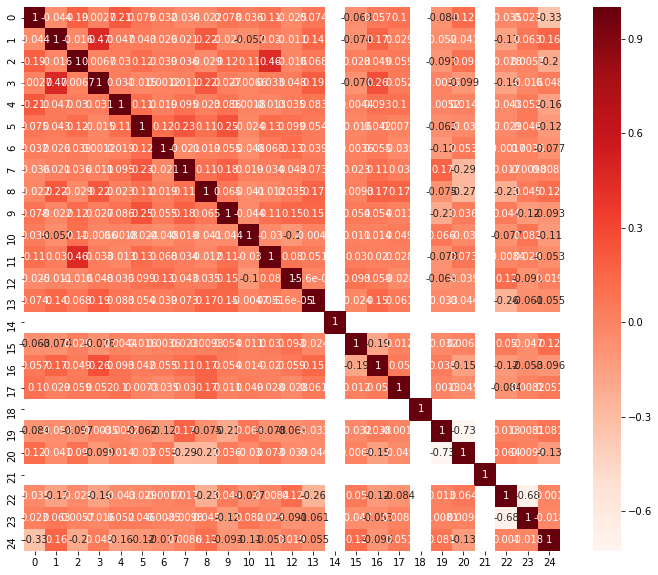

In [165]:
import seaborn as sns 
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataNumericPropre1.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [166]:
for i in  range (dataNumericPropre1.shape[1]):
    for j in range (i+1 , dataNumericPropre1.shape[1] ):
        corl = dataNumericPropre1.iloc[:,i].corr(dataNumericPropre1.iloc[:,j],method='kendall')
        if (corl >= 0.8):
            print(i)
            print(j)
            print(corl)

In [167]:
X_bad1 = dataNumericPropre1
print(X_bad1.shape) 
Y_bad1= Newcible
transformer = KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(X_bad1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_transformed, Y_bad1[0:896], random_state=0)

(896, 25)


## Aprés Modification: 
## on test le meilleur nb de comp avec PCA pour appliquer le RandomForest et on a obtenu 17 composants avec une précision de 0.96

In [168]:
y_pred_rfc =[]
def pca_n_accuracy_rfc(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad1)
    global y_pred_rfc
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    return (rfc.score(X_test, y_test))

In [169]:
accuracy = 0
nb_components = 0 
for i in range (1,X_bad1
                .shape[1]):
    acc = pca_n_accuracy_rfc(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)
print (y_pred_rfc)

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3

0.9821428571428571
17
[0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1
 0 0]


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Aprés Modification: 
## on test le meilleur nb de comp avec PCA pour appliquer le Dec Tree et on a obtenu 17 composants avec une précision de 0.9

In [170]:
from sklearn.tree import DecisionTreeClassifier 
predictions_dt = []
def pca_n_accuracy_DecisionT(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad1)
    global predictions_dt
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    predictions_dt = decision_tree.predict(X_test)
    return (decision_tree.score(X_test, y_test))

In [171]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad1.shape[1]):
    acc = pca_n_accuracy_DecisionT(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)
print(len(X_train)) 
print('ffffffff')
print(len(X_test))
print (predictions_dt)

0.90625
19
750
ffffffff
250
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## Aprés Modification: 
## on test le meilleur nb de comp avec PCA pour appliquer le knn et on a obtenu 4 composants avec une précision de 0.70

In [172]:
y_pred_knn =[]
def pcaKernel_n_accuracy_knn(n):
    transformer = KernelPCA(n_components=n, kernel='rbf')
    X_transformed = transformer.fit_transform(X_bad1)


    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    global y_pred_knn
    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    return (knn.score(X_test, y_test))

In [173]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad1.shape[1]):
    acc = pcaKernel_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)
print(y_pred_knn) 

0.7008928571428571
4
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0]


## Aprés Modification: 
## La courbe ROC pour les données aprés suppression des points abbérants et application du PCA

In [174]:
fpr1, tpr1, threshold1 = roc_curve(y_test1, predictions_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test1, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

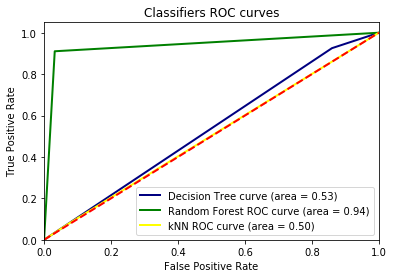

In [175]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Decision Tree curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [176]:
#RF donne la meilleur résultat dans la courbe ROC. 

## Sans ACP

#### On va entrener la modéle avec la dataframe initiale en eliminant les points abbérants 

In [177]:
### Supression des points abérants   
###Insertion du cible et faire la réduction puis séparation

In [178]:
from scipy import stats
import numpy as np 
dataNumeric.insert(25,"cible",cible_german)
print(len(dataNumeric.columns))
z = np.abs(stats.zscore(dataNumeric))
print(z)

26
[[1.25456565 1.23647786 1.34401408 ... 0.76635604 0.65465367 0.65465367]
 [0.45902624 2.24819436 0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [1.13205258 0.73866754 1.34401408 ... 1.30487651 0.65465367 0.65465367]
 ...
 [1.13205258 0.73866754 0.50342796 ... 0.76635604 0.65465367 0.65465367]
 [1.25456565 1.9992892  0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [0.45902624 1.9992892  1.34401408 ... 0.76635604 0.65465367 0.65465367]]


In [179]:
#Liste des points abbérants pour un seuil de 3 
threshold = 3
np.where(z > 3);

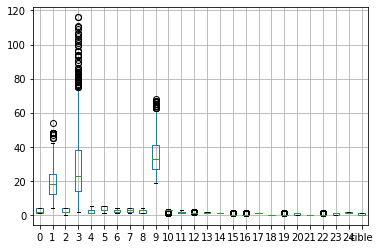

In [180]:
#dataframe aprés la suppression des points
dataNumericPropre1 = dataNumeric[(z < 3).all(axis=1)]
dataNumericPropre1.boxplot()

In [181]:
dataNumericPropre.shape

(1000, 26)

In [182]:
dataNumericPropre1.shape

(821, 26)

In [183]:
#Séparer la cible de données aprés réduction des points abbérants
Newcible = dataNumericPropre1.iloc[:,25] 
dataNumericPropre1 = dataNumericPropre1.iloc[:,0:25]

In [184]:
print(dataNumericPropre1) 
print (Newcible)

     0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0     1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1     2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2     4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
4     1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
5     4  36   2  91   5   3   3   4   4  35  ...   0   0   1   0   0   0   0   
6     4  24   2  28   3   5   3   4   2  53  ...   0   0   1   0   0   1   0   
7     2  36   2  69   1   3   3   2   3  35  ...   0   1   1   0   1   0   0   
8     4  12   2  31   4   4   1   4   1  61  ...   0   0   1   0   0   1   0   
9     2  30   4  52   1   1   4   2   3  28  ...   1   0   1   0   0   1   0   
10    2  12   2  13   1   2   2   1   3  25  ...   1   0   1   0   1   0   0   
11    1  48   2  43   1   2   2   4   2  24  ...   0   0   1   0   1   0   0   
12    2  12   2  16   1   3   2   1   3 

In [185]:
##Appliquer KNN Aprés suppresion des Points abbérants. 

In [190]:
german_Bank_Final.head()

,Duration,Credit_amount,Installment_percentage,Present_residence,Age_years,existing_credits,people_maintenance,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [187]:
german_Bank_Final.columns

Index(['Duration', 'Credit_amount', 'Installment_percentage',
       'Present_residence', 'Age_years', 'existing_credits',
       'people_maintenance', 'Status_A11', 'Status_A12', 'Status_A13',
       'Status_A14', 'CredHist_A30', 'CredHist_A31', 'CredHist_A32',
       'CredHist_A33', 'CredHist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
       'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'SaveAccount_A61', 'SaveAccount_A62', 'SaveAccount_A63',
       'SaveAccount_A64', 'SaveAccount_A65', 'YOJ_A71', 'YOJ_A72', 'YOJ_A73',
       'YOJ_A74', 'YOJ_A75', 'Status&Sex_A91', 'Status&Sex_A92',
       'Status&Sex_A93', 'Status&Sex_A94', 'DebGuarant_A101',
       'DebGuarant_A102', 'DebGuarant_A103', 'Property_A121', 'Property_A122',
       'Property_A123', 'Property_A124', 'InstallPlan_A141',
       'InstallPlan_A142', 'InstallPlan_A143', 'Housing_A151', 'Housing_A152',
       'Housing_A153', 'Job_A171', 'Job_A172'

In [204]:
X_bad = german_Bank_Final
X_bad.head()

,Duration,Credit_amount,Installment_percentage,Present_residence,Age_years,existing_credits,people_maintenance,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


## Modéle KNN pour la DataFrame 'dataNumeric'

In [205]:
Y_bad= german_Bank.iloc[:,20]


Text(0, 0.5, 'Erreur')

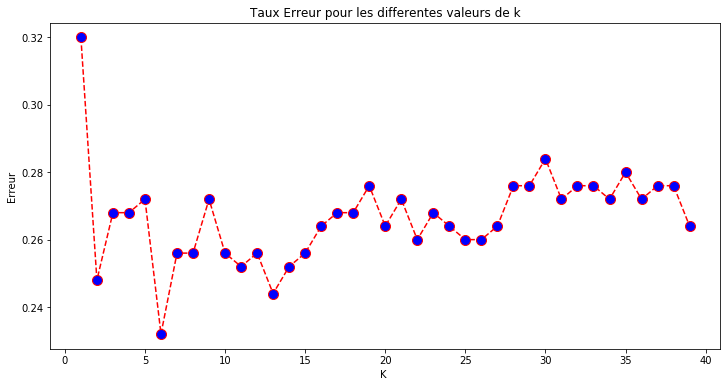

In [206]:
#choisir K pour le modéle
X_train, X_test, y_train, y_test = train_test_split(X_bad, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [207]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [208]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.74


In [210]:
#saving model 
pickle.dump(knn , open('model.pkl','wb'))

In [201]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


In [202]:
X_bad.columns

Index(['Duration', 'Credit_amount', 'Installment_percentage',
       'Present_residence', 'Age_years', 'existing_credits',
       'people_maintenance', 'Status_A11', 'Status_A12', 'Status_A13',
       'Status_A14', 'CredHist_A30', 'CredHist_A31', 'CredHist_A32',
       'CredHist_A33', 'CredHist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
       'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'SaveAccount_A61', 'SaveAccount_A62', 'SaveAccount_A63',
       'SaveAccount_A64', 'SaveAccount_A65', 'YOJ_A71', 'YOJ_A72', 'YOJ_A73',
       'YOJ_A74', 'YOJ_A75', 'Status&Sex_A91', 'Status&Sex_A92',
       'Status&Sex_A93', 'Status&Sex_A94', 'DebGuarant_A101',
       'DebGuarant_A102', 'DebGuarant_A103', 'Property_A121', 'Property_A122',
       'Property_A123', 'Property_A124', 'InstallPlan_A141',
       'InstallPlan_A142', 'InstallPlan_A143', 'Housing_A151', 'Housing_A152',
       'Housing_A153', 'Job_A171', 'Job_A172'

In [ ]:
german_Bank.head()

In [ ]:
2 credit_history  3!!! 

In [203]:
Y_bad.head()

0    1
1    2
2    1
3    1
4    2
Name: Cost, dtype: int64